In [93]:
#„ÉÜ„É≥„Éó„É¨„Éº„Éà

# „É¢„Ç∏„É•„Éº„É´„ÅÆ„Ç§„É≥„Éù„Éº„Éà
import numpy as np  # Êï∞ÂÄ§Ë®àÁÆó„ÇÑÈÖçÂàóÊìç‰Ωú„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
import pandas as pd  # Ë°®ÂΩ¢Âºè„ÅÆ„Éá„Éº„Çø„ÇíÊâ±„ÅÜ„Åü„ÇÅ„ÅÆ„É©„Ç§„Éñ„É©„É™
import matplotlib.pyplot as plt  # „Éá„Éº„ÇøÂèØË¶ñÂåñ„ÅÆ„Åü„ÇÅ„ÅÆÂü∫Êú¨ÁöÑ„Å™„Ç∞„É©„ÉïÊèèÁîª„É©„Ç§„Éñ„É©„É™
import seaborn as sns  # È´òÊ©üËÉΩ„Å™Áµ±Ë®à„Ç∞„É©„Éï„ÇíÊèèÁîª„Åô„Çã„É©„Ç§„Éñ„É©„É™
import lightgbm as lgb
import optuna
import os
import datetime
from sklearn.preprocessing import LabelEncoder  # „Ç´„ÉÜ„Ç¥„É™Â§âÊï∞„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ„Åô„Çã„Ç®„É≥„Ç≥„Éº„ÉÄ
from sklearn.metrics import roc_auc_score  # ROC AUC„Çπ„Ç≥„Ç¢„ÇíË®àÁÆó„Åô„ÇãË©ï‰æ°ÊåáÊ®ô
from sklearn.model_selection import KFold  # ÈÄöÂ∏∏„ÅÆKÂàÜÂâ≤‰∫§Â∑ÆÊ§úË®ºÔºà‰ªäÂõû‰ΩøÁî®Ôºâ
from lightgbm import LGBMClassifier  # LightGBM„ÅÆ„É¢„Éá„É´„ÇØ„É©„Çπ



# Ë™≠„ÅøËæº„ÇÄ„Éá„Éº„Çø„ÅåÊ†ºÁ¥ç„Åï„Çå„Åü„Éá„Ç£„É¨„ÇØ„Éà„É™„ÅÆ„Éë„ÇπÔºà‚ÄªÂøÖË¶Å„Å´Âøú„Åò„Å¶Â§âÊõ¥„ÅÆÂøÖË¶Å„Åå„ÅÇ„Çä„Åæ„ÅôÔºâ
PATH = '../data/'


df = pd.read_csv(PATH + 'train.csv')  # Â≠¶ÁøíÁî®„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø
test = pd.read_csv(PATH + 'test.csv')    # „ÉÜ„Çπ„ÉàÁî®„Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

In [94]:
# Ê¨†ÊêçÁä∂Ê≥Å„Éª„Éâ„É©„Éï„ÉàÁéáÂ∑Æ„ÉªÊ¨†ÊêçÁéá„Çí‰∏ÄË¶ßË°®Á§∫
for col in df.columns:
    if df[col].isnull().any():
        missing_rate = df[col].isnull().mean()
        drafted_with_na = df[df[col].isnull()]["Drafted"].mean()
        drafted_without_na = df[df[col].notnull()]["Drafted"].mean()
        diff = abs(drafted_with_na - drafted_without_na)
        print(f"{col} | Ê¨†ÊêçÁéá: {missing_rate:.3%} | Ê¨†Êêç„ÅÇ„Çä: {drafted_with_na:.3f}, Ê¨†Êêç„Å™„Åó: {drafted_without_na:.3f}, Â∑Æ: {diff:.3f}")


Age | Ê¨†ÊêçÁéá: 15.642% | Ê¨†Êêç„ÅÇ„Çä: 0.018, Ê¨†Êêç„Å™„Åó: 0.765, Â∑Æ: 0.747
Sprint_40yd | Ê¨†ÊêçÁéá: 5.214% | Ê¨†Êêç„ÅÇ„Çä: 0.586, Ê¨†Êêç„Å™„Åó: 0.652, Â∑Æ: 0.066
Vertical_Jump | Ê¨†ÊêçÁéá: 19.921% | Ê¨†Êêç„ÅÇ„Çä: 0.585, Ê¨†Êêç„Å™„Åó: 0.664, Â∑Æ: 0.079
Bench_Press_Reps | Ê¨†ÊêçÁéá: 25.926% | Ê¨†Êêç„ÅÇ„Çä: 0.602, Ê¨†Êêç„Å™„Åó: 0.665, Â∑Æ: 0.063
Broad_Jump | Ê¨†ÊêçÁéá: 20.892% | Ê¨†Êêç„ÅÇ„Çä: 0.594, Ê¨†Êêç„Å™„Åó: 0.663, Â∑Æ: 0.069
Agility_3cone | Ê¨†ÊêçÁéá: 34.880% | Ê¨†Êêç„ÅÇ„Çä: 0.605, Ê¨†Êêç„Å™„Åó: 0.671, Â∑Æ: 0.066
Shuttle | Ê¨†ÊêçÁéá: 32.794% | Ê¨†Êêç„ÅÇ„Çä: 0.601, Ê¨†Êêç„Å™„Åó: 0.671, Â∑Æ: 0.071


# üìå ÁâπÂæ¥ÈáèÂà•„ÅÆÂá¶ÁêÜ‰∏ÄË¶ß

## ‚ë† Id
ÂâäÈô§

In [95]:
# Id ÂâäÈô§
df = df.drop(columns=["Id"])
test = test.drop(columns=["Id"])

## ‚ë° Age
Ê¨†Êêç„Çí -1 „ÅßË£úÂÆåÔºàAge_filledÔºâ

Ê¨†Êêç„Éï„É©„Ç∞ÔºàAge_missingÔºâ

ÂÖÉ„ÅÆ Age „Ç´„É©„É†„ÅØ ÂâäÈô§

In [96]:
# Age Ê¨†ÊêçË£úÂÆå„ÉªÊ¨†Êêç„Éï„É©„Ç∞„ÉªÂÖÉ„Ç´„É©„É†ÂâäÈô§
df["Age_filled"] = df["Age"].fillna(-1)
df["Age_missing"] = df["Age"].isna().astype(int)
df = df.drop(columns=["Age"])

test["Age_filled"] = test["Age"].fillna(-1)
test["Age_missing"] = test["Age"].isna().astype(int)
test = test.drop(columns=["Age"])


In [97]:
# Ê¨†Êêç„Ç´„É©„É†ÊäΩÂá∫
na_cols = df.columns[df.isnull().any()]

# ‰∏≠Â§ÆÂÄ§„ÅßË£úÂÆåÔºàdf / test ‰∏°ÊñπÔºâ
for col in na_cols:
    median = df[col].median()
    df[col] = df[col].fillna(median)
    test[col] = test[col].fillna(median)

In [98]:
# Ê¨†Êêç„ÅåÊÆã„Å£„Å¶„ÅÑ„Çã„Ç´„É©„É†„Å®‰ª∂Êï∞„ÇíÁ¢∫Ë™ç
print(df.isnull().sum())

# Ê¨†Êêç„ÅåÊÆã„Å£„Å¶„ÅÑ„Çã„Ç´„É©„É†„ÅÆ„ÅøÊäΩÂá∫ÔºàÁ¢∫Ë™çÁî®Ôºâ
print(df.columns[df.isnull().any()])


Year                0
School              0
Height              0
Weight              0
Sprint_40yd         0
Vertical_Jump       0
Bench_Press_Reps    0
Broad_Jump          0
Agility_3cone       0
Shuttle             0
Player_Type         0
Position_Type       0
Position            0
Drafted             0
Age_filled          0
Age_missing         0
dtype: int64
Index([], dtype='object')


## ‚ë¢ Year
ÁâπÂà•„Å™Âá¶ÁêÜ„Å™„ÅóÔºà„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®Ôºâ

In [99]:
# Year „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®ÔºàÂá¶ÁêÜ‰∏çË¶ÅÔºâ
# df["Year"], test["Year"] „Çí„Åù„ÅÆ„Åæ„ÅæÊÆã„Åô

## ‚ë£ Height
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

BMI ‰ΩúÊàê„Å´‰ΩøÁî®


In [100]:
# Height „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# BMI ‰ΩúÊàê„Å´‰ΩøÁî®
df["BMI"] = df["Weight"] / (df["Height"]/100)**2
test["BMI"] = test["Weight"] / (test["Height"]/100)**2

## ‚ë§ Weight
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

Weight_lbs = Weight * 2.20462 „Å´Â§âÊèõ

SpeedScore ‰ΩúÊàê„Å´‰ΩøÁî®
 
BMI ‰ΩúÊàê„Å´‰ΩøÁî®

In [101]:
# Weight „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# lbs Â§âÊèõ
df["Weight_lbs"] = df["Weight"] * 2.20462
test["Weight_lbs"] = test["Weight"] * 2.20462

# SpeedScore ‰ΩúÊàê
df["SpeedScore"] = df["Weight_lbs"] * (200 / df["Sprint_40yd"]**2)
test["SpeedScore"] = test["Weight_lbs"] * (200 / test["Sprint_40yd"]**2)


## ‚ë• Sprint_40yd
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

SpeedScore ‰ΩúÊàê„Å´‰ΩøÁî®

RSAÁâπÂæ¥Èáè„Çª„ÉÉ„Éà„Å´Âê´„ÇÄ



In [102]:
# Sprint_40yd „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# SpeedScore ‰ΩúÊàê„Å´‰ΩøÁî®Ê∏à
# RSAÁâπÂæ¥Èáè‰ΩúÊàêÊôÇ„Å´Âà©Áî®ÔºàÂæåËø∞Ôºâ

## ‚ë¶ Vertical_Jump
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

BurstScore ‰ΩúÊàê„Å´‰ΩøÁî®

RSAÁâπÂæ¥Èáè„Çª„ÉÉ„Éà„Å´Âê´„ÇÄ

In [103]:
# Vertical_Jump „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# BurstScore ‰ΩúÊàê
df["BurstScore"] = df["Vertical_Jump"] + df["Broad_Jump"]
test["BurstScore"] = test["Vertical_Jump"] + test["Broad_Jump"]


## ‚ëß Bench_Press_Reps
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

RSAÁâπÂæ¥Èáè„Çª„ÉÉ„Éà„Å´Âê´„ÇÄ

In [104]:
# Bench_Press_Reps „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# RSAÁâπÂæ¥Èáè‰ΩúÊàêÊôÇ„Å´Âà©Áî®ÔºàÂæåËø∞Ôºâ


## ‚ë® Broad_Jump
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

BurstScore ‰ΩúÊàê„Å´‰ΩøÁî®

In [105]:
# Broad_Jump „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# BurstScore ‰ΩúÊàê„Å´‰ΩøÁî®Ê∏à


## ‚ë© Agility_3cone
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

AgilityScore ‰ΩúÊàê„Å´‰ΩøÁî®

RSAÁâπÂæ¥Èáè„Çª„ÉÉ„Éà„Å´Âê´„ÇÄ

In [106]:
# Agility_3cone „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# AgilityScore ‰ΩúÊàê
df["AgilityScore"] = df["Shuttle"] + df["Agility_3cone"]
test["AgilityScore"] = test["Shuttle"] + test["Agility_3cone"]

## ‚ë™ Shuttle
„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®

AgilityScore ‰ΩúÊàê„Å´‰ΩøÁî®

RSAÁâπÂæ¥Èáè„Çª„ÉÉ„Éà„Å´Âê´„ÇÄ



In [107]:
# Shuttle „ÅØ„Åù„ÅÆ„Åæ„Åæ‰ΩøÁî®
# AgilityScore ‰ΩúÊàê„Å´‰ΩøÁî®Ê∏à


## ‚ë´ Player_Type
ÂâäÈô§

In [108]:
# Player_Type ÂâäÈô§
df = df.drop(columns=["Player_Type"])
test = test.drop(columns=["Player_Type"])


## ‚ë¨ Position_Type
ÂâäÈô§

In [109]:
# Position_Type ÂâäÈô§
df = df.drop(columns=["Position_Type"])
test = test.drop(columns=["Position_Type"])


## ‚ë≠ Position
Target Encoding

\text{Position_encoded} = E[\text{Drafted}|\text{Position}]
Position Group Encoding

\text{Position_group_encoded} = E[\text{Drafted}|\text{Position_group}]
ÔºàPosition_group „ÅØ map_position_group() „Å´„Çà„ÇäÁîüÊàêÔºâ

ÂÖÉ„ÅÆ Position, Position_group „ÅØ ÂâäÈô§

In [110]:
# Position Target Encoding
position_target_map = df.groupby("Position")["Drafted"].mean()
df["Position_encoded"] = df["Position"].map(position_target_map)
test["Position_encoded"] = test["Position"].map(position_target_map)
test["Position_encoded"] = test["Position_encoded"].fillna(df["Position_encoded"].mean())

# Position Group Encoding
def map_position_group(pos):
    if pos in ["K", "P", "LS"]:
        return "Specialist"
    elif pos in ["WR", "RB", "TE"]:
        return "OffensiveSkill"
    elif pos in ["OT", "OG", "C"]:
        return "OffensiveLine"
    elif pos in ["DE", "DT"]:
        return "DefensiveLine"
    elif pos in ["OLB", "ILB"]:
        return "Linebacker"
    elif pos in ["CB", "FS", "SS", "S", "DB"]:
        return "DefensiveBack"
    elif pos == "QB":
        return "Quarterback"
    elif pos == "FB":
        return "Fullback"
    else:
        return "Other"

df["Position_group"] = df["Position"].apply(map_position_group)
test["Position_group"] = test["Position"].apply(map_position_group)

position_group_target_map = df.groupby("Position_group")["Drafted"].mean()
df["Position_group_encoded"] = df["Position_group"].map(position_group_target_map)
test["Position_group_encoded"] = test["Position_group"].map(position_group_target_map)
test["Position_group_encoded"] = test["Position_group_encoded"].fillna(df["Position_group_encoded"].mean())

# ÂÖÉ„ÅÆ Position, Position_group „ÇíÂâäÈô§
df = df.drop(columns=["Position", "Position_group"])
test = test.drop(columns=["Position", "Position_group"])


## ‚ëÆ School
Â≠¶Ê†°Âêç (School) „Åù„ÅÆ„ÇÇ„ÅÆ„ÅØ ÂâäÈô§

‰ª•‰∏ã„ÅÆÁâπÂæ¥Èáè„Å∏Â§âÊèõ„Åó„Å¶‰ΩøÁî®Ôºö

School_Top
‰∏ä‰ΩçÊ†°„Éï„É©„Ç∞Ôºà„Éâ„É°„Ç§„É≥Áü•Ë≠ò„Å´Âü∫„Å•„Åç‰∏ªË¶ÅÊ†°„ÅÆ„Åø 1„ÄÅ„Åù„Çå‰ª•Â§ñ 0Ôºâ

School_Drafted_Count
Â≠¶Ê†°„Åî„Å®„ÅÆ NFL „Éâ„É©„Éï„ÉàÊåáÂêçÊï∞

School_Drafted_Rate_TE
Â≠¶Ê†°„Åî„Å®„ÅÆ fold-safe Target Encoding „Å´„Çà„Çã„Éâ„É©„Éï„ÉàÁéá

Â§âÊèõÂæå„ÄÅÂÖÉ„ÅÆ School „Ç´„É©„É†„ÅØÂâäÈô§„Åó„ÄÅ
School_Top, School_Drafted_Count, School_Drafted_Rate_TE „ÅÆ 3 ÁâπÂæ¥Èáè„ÅåÊúÄÁµÇÁöÑ„Å´‰ΩøÁî®„Åï„Çå„Çã„ÄÇ

In [111]:
# School ÁâπÂæ¥ÈáèÁîüÊàê
school_drafted_count = df.groupby("School")["Drafted"].count()
school_drafted_rate = df.groupby("School")["Drafted"].mean()
top_schools = school_drafted_count.sort_values(ascending=False).head(50).index

df["School_Top"] = df["School"].isin(top_schools).astype(int)
test["School_Top"] = test["School"].isin(top_schools).astype(int)

df["School_Drafted_Count"] = df["School"].map(school_drafted_count)
test["School_Drafted_Count"] = test["School"].map(school_drafted_count).fillna(0)

school_drafted_rate_map = df.groupby("School")["Drafted"].mean()
df["School_Drafted_Rate_TE"] = df["School"].map(school_drafted_rate_map)
test["School_Drafted_Rate_TE"] = test["School"].map(school_drafted_rate_map).fillna(df["Drafted"].mean())

# ÂÖÉ„ÅÆ School „Ç´„É©„É†ÂâäÈô§
df = df.drop(columns=["School"])
test = test.drop(columns=["School"])


## üéØ RSAÁâπÂæ¥ÈáèÔºàRelative Score AnalysisÔºâ
‰ª•‰∏ã„ÅÆÁâπÂæ¥Èáè„ÇíÂü∫„Å´‰ΩúÊàêÔºö

Sprint_40yd, Vertical_Jump, Bench_Press_Reps, Shuttle, Agility_3cone

In [112]:
# RSAÁâπÂæ¥Èáè‰ΩúÊàê
rsa_cols = ["Sprint_40yd", "Vertical_Jump", "Bench_Press_Reps", "Shuttle", "Agility_3cone"]

for col in rsa_cols:
    mean = df[col].mean()
    std = df[col].std()
    
    df[f"RSA_{col}"] = (df[col] - mean) / std
    test[f"RSA_{col}"] = (test[col] - mean) / std


## ‚úÖ ÁîüÊàê„Åï„Çå„ÇãÊñ∞ÁâπÂæ¥Èáè„Åæ„Å®„ÇÅ
BurstScore

AgilityScore

SpeedScore

BMI

RSA_* Á≥ªÁâπÂæ¥Èáè

School_* Á≥ªÁâπÂæ¥Èáè

Position_encoded, Position_group_encoded

Age_filled, Age_missing

In [113]:
# üìå df„ÅÆ‰∏≠Ë∫´Á¢∫Ë™çÔºà„Ç´„É©„É†‰∏ÄË¶ß„ÄÅÂÖàÈ†≠5Ë°å„ÄÅÊ¨†ÊêçÁä∂Ê≥ÅÔºâ

# „Ç´„É©„É†‰∏ÄË¶ß
print(df.columns.tolist())

# ÂÖàÈ†≠5Ë°å
print(df.head())

# Ê¨†ÊêçÁä∂Ê≥ÅÔºà‰ª∂Êï∞Ôºâ
print(df.isnull().sum())

# Ê¨†ÊêçÁä∂Ê≥ÅÔºàÂâ≤ÂêàÔºâ
print(df.isnull().mean())


['Year', 'Height', 'Weight', 'Sprint_40yd', 'Vertical_Jump', 'Bench_Press_Reps', 'Broad_Jump', 'Agility_3cone', 'Shuttle', 'Drafted', 'Age_filled', 'Age_missing', 'BMI', 'Weight_lbs', 'SpeedScore', 'BurstScore', 'AgilityScore', 'Position_encoded', 'Position_group_encoded', 'School_Top', 'School_Drafted_Count', 'School_Drafted_Rate_TE', 'RSA_Sprint_40yd', 'RSA_Vertical_Jump', 'RSA_Bench_Press_Reps', 'RSA_Shuttle', 'RSA_Agility_3cone']
   Year  Height      Weight  Sprint_40yd  Vertical_Jump  Bench_Press_Reps  \
0  2011  1.9050  140.160042         5.39          59.69              29.0   
1  2011  1.8288   87.089735         4.31         101.60              16.0   
2  2018  1.8542   92.986436         4.51          91.44              10.0   
3  2010  1.9304  148.778297         5.09          76.20              39.0   
4  2016  1.8796   92.079251         4.64          78.74              20.0   

   Broad_Jump  Agility_3cone  Shuttle  Drafted  ...  Position_encoded  \
0      251.46           7.

In [114]:
# ÁõÆÁöÑÂ§âÊï∞„Å®Ë™¨ÊòéÂ§âÊï∞„Å´ÂàÜÂâ≤
y = df["Drafted"]
X = df.drop(columns=["Drafted"])


[LightGBM] [Info] Number of positive: 1445, number of negative: 779
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2402
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.649730 -> initscore=0.617854
[LightGBM] [Info] Start training from score 0.617854
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[92]	valid_0's auc: 0.86296	valid_0's binary_logloss: 0.41072
‚úÖ Fold 1 - Train AUC: 0.8927, Validation AUC: 0.8630


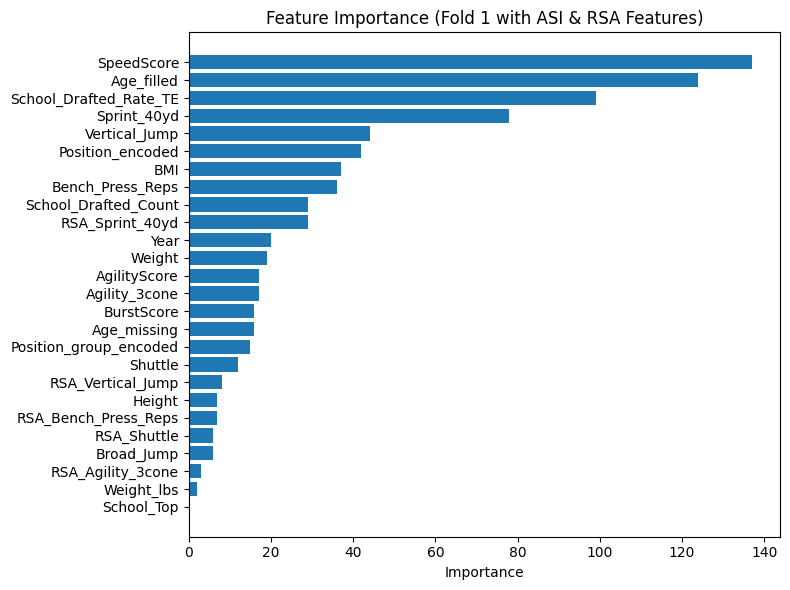

[LightGBM] [Info] Number of positive: 1448, number of negative: 777
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 2225, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.650787 -> initscore=0.622498
[LightGBM] [Info] Start training from score 0.622498
Training until validation scores don't improve for 30 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[131]	valid_0's auc: 0.859954	valid_0's binary_logloss: 0.417628
‚úÖ Fold 2 - Train AUC: 0.9026, Validation AUC: 0.8600
[LightGBM] [Info] Number of positive: 1442, number of negative: 783
[Li

In [121]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt  # ËøΩÂä†

# ‚úÖ Âõ∫ÂÆö„Éë„É©„É°„Éº„Çø
model = LGBMClassifier(
    max_depth=6,
    num_leaves=10,
    min_child_samples=38,
    reg_alpha=8.18,
    reg_lambda=8.07,
    learning_rate=0.0442,
    n_estimators=1000,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
train_aucs = []
val_aucs = []

for fold, (train_idx, valid_idx) in enumerate(kf.split(X)):
    X_train, X_valid = X.iloc[train_idx], X.iloc[valid_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[valid_idx]

    model.fit(
        X_train, y_train,
        eval_set=[(X_valid, y_valid)],
        eval_metric='auc',
        callbacks=[
            lgb.early_stopping(stopping_rounds=30),
            lgb.log_evaluation(0)
        ]
    )

    y_train_pred = model.predict_proba(X_train)[:, 1]
    y_valid_pred = model.predict_proba(X_valid)[:, 1]

    train_auc = roc_auc_score(y_train, y_train_pred)
    val_auc = roc_auc_score(y_valid, y_valid_pred)

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)

    print(f"‚úÖ Fold {fold + 1} - Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

    if fold == 0:
        importances = model.feature_importances_
        feature_names = X.columns

        # „ÇΩ„Éº„ÉàÔºàÈáçË¶ÅÂ∫¶ÈôçÈ†ÜÔºâ
        sorted_idx = importances.argsort()
        sorted_importances = importances[sorted_idx]
        sorted_feature_names = feature_names[sorted_idx]

        plt.figure(figsize=(8, 6))
        plt.barh(sorted_feature_names, sorted_importances)
        plt.title("Feature Importance (Fold 1 with ASI & RSA Features)")
        plt.xlabel("Importance")
        plt.tight_layout()
        plt.show()

print(f"\n‚úÖ Average Train AUC: {np.mean(train_aucs):.4f}")
print(f"‚úÖ Average Validation AUC: {np.mean(val_aucs):.4f}")


In [115]:
# üîÑ ÊèêÂá∫Áî®„Éï„Ç°„Ç§„É´„ÅÆ‰ΩúÊàêÂá¶ÁêÜÔºàLightGBM„É¢„Éá„É´„Å´Âü∫„Å•„Åè‰∫àÊ∏¨Ôºâ

# original_test „ÇíÂÜçË™≠„ÅøËæº„Åø„Åó„Å¶ Id „ÇíÂæ©ÂÖÉ
original_test = pd.read_csv(PATH + "test.csv")

# ÊèêÂá∫Áî®ÁâπÂæ¥ÈáèÂàó„ÅØ X.columns „ÅßÁ¢∫ÂÆö„Åï„Åõ„Çã
feature_cols = X.columns.tolist()

# test „Å´Â≠òÂú®„Åó„Å™„ÅÑÂàó„Åå„ÅÇ„Çå„Å∞Âüã„ÇÅ„ÇãÔºàÂÆâÂÖ®Ôºâ
missing_cols = set(feature_cols) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # „Åæ„Åü„ÅØ np.nan / Âπ≥ÂùáÂÄ§„Å™„Å©

# ÂàóÈ†Ü„ÇíÊèÉ„Åà„Çã
X_test = test[feature_cols]


# LightGBM„É¢„Éá„É´„Åß‰∫àÊ∏¨ÔºàDrafted=1 „ÅÆÁ¢∫ÁéáÔºâ
y_pred = model.predict_proba(X_test)[:, 1]

# ÊèêÂá∫Áî®DataFrame„Çí‰ΩúÊàê
submission = pd.DataFrame({
    "Id": original_test["Id"],
    "Drafted": 1 - y_pred  # ‚Üê „Åì„Çå„Å†„ÅëÂ§âÊõ¥
})

# ‰øùÂ≠ò„Éá„Ç£„É¨„ÇØ„Éà„É™„Çí„Éó„É≠„Ç∏„Çß„ÇØ„Éà„É´„Éº„Éà„Å´‰ΩúÊàê
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
save_dir = os.path.join(root_dir, "submissions")
os.makedirs(save_dir, exist_ok=True)

import os
import datetime
import re  # ‚Üê „Åì„Çå„ÇíÂøò„Çå„Åö„Å´ÔºÅ

try:
    import ipynbname
    notebook_path = ipynbname.path()
    notebook_name = notebook_path.stem  # „Éï„Ç°„Ç§„É´ÂêçÔºàÊã°ÂºµÂ≠ê„Å™„ÅóÔºâ
except:
    notebook_name = "14_0703_notebook()"   # fallback

# Êï∞Â≠ó„Å®„Ç¢„É≥„ÉÄ„Éº„Çπ„Ç≥„Ç¢ÈÉ®ÂàÜ„Å†„ÅëÊäΩÂá∫Ôºà‰æãÔºö06_0627Ôºâ
match = re.search(r"\d{2}_\d{4}", notebook_name)
tag = match.group() if match else notebook_name

filename = f"submission_{tag}.csv"


# ÊèêÂá∫„Éï„Ç°„Ç§„É´Âêç„ÇíÁµÑ„ÅøÁ´ã„Å¶„Çã
filename = f"submission_{tag}.csv"
save_path = os.path.join(save_dir, filename)

# Êõ∏„ÅçÂá∫„Åó
submission.to_csv(save_path, index=False)
print(f"‚úÖ ÊèêÂá∫„Éï„Ç°„Ç§„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: {save_path}")

‚úÖ ÊèêÂá∫„Éï„Ç°„Ç§„É´„Çí‰øùÂ≠ò„Åó„Åæ„Åó„Åü: c:\Users\81807\Desktop\Kaggle\GCI‚ë°(NFL Draft Prediction)\submissions\submission_14_0703.csv
